In the last video we saw how to create a line chart. Now we are going to learn how to create bar charts and how to analyze data from a csv. 

The last vid we ran the plt.plot() method to create a line chart. Now we will run the plt.bar() to create the bar chart. The data we will be using is coming from the csv file in this directory called "data_for_tutorial_part_2"

But before we get into that. Let's look into what a bar chart would look like with the data from the first vid. 

First we will make a bar chart with just the salary data from all devs. Then we will make one with three separate bars, python, javascript, and then all devs. 

Here is the code and first bar chart. I had to comment out a lot of the code to get the simple bar with all devs. 

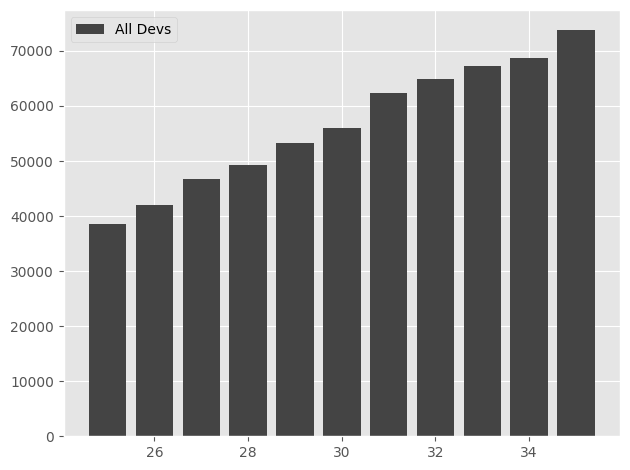

In [1]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]
plt.bar(ages_x, dev_y, color='#444444', label='All Devs')

#plt.plot(ages_x, dev_y, color='#444444', linestyle='--', marker='.',  label='All Devs')

# py_dev_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]

# plt.plot(ages_x, py_dev_y, color='#5a7d9a', linestyle='-',marker='.',linewidth=3,label='Python')

# js_dev_y = [37810, 43515, 46823, 49293, 53437,56373, 62375, 66674, 68745, 68746, 74583]

# plt.plot(ages_x, js_dev_y, color='#adad3b', linestyle='-',marker='.',linewidth=3,label='JavaScript')

# plt.title('Median Salary (USD) by Age')
# plt.xlabel('Ages')
# plt.ylabel('Median Salary (USD)')

plt.legend()

plt.grid(True)

plt.tight_layout()

plt.show() # you have to run this in order to actually show the plot.

Now let's do the mutliple bar chart. You will see where we had to import numpy and use the arrage functon in order to create a numpy array which out of the x-axis variable in order to offeset up and down the different bar charts we executed together in order to have them side by side. 

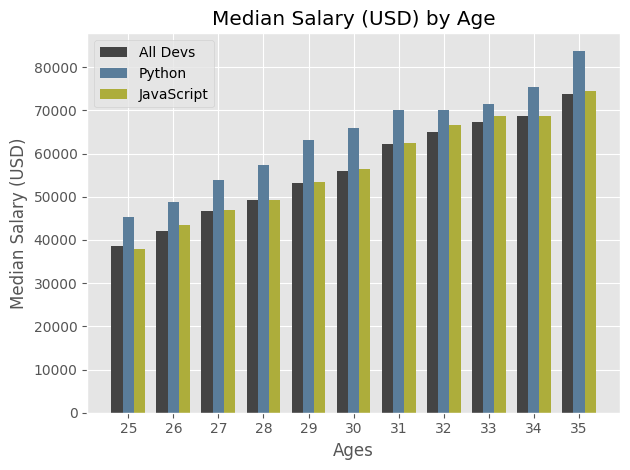

In [2]:
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]

#numpy code here:
x_indexes = np.arange(len(ages_x))
width = 0.25

plt.bar(x_indexes - width, dev_y, color='#444444', width=width,  label='All Devs')

py_dev_y = [45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640]

plt.bar(x_indexes, py_dev_y, color='#5a7d9a',  width=width, label='Python')

js_dev_y = [37810, 43515, 46823, 49293, 53437,56373, 62375, 66674, 68745, 68746, 74583]

plt.bar(x_indexes + width, js_dev_y, color='#adad3b',  width=width,label='JavaScript')

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.legend()

plt.xticks(ticks=x_indexes, labels=ages_x)

plt.grid(True)

plt.tight_layout()

plt.show() # you have to run this in order to actually show the plot.

On the first run you will notice the x-axis is no longer the ages but instead the indexes of the array. To fix this, see code above underneath the legend() 

Let's now load in some data and make some charts off of that.

In [5]:
import csv

with open('data_for_tutorial_part_2.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file) 
    row = next(csv_reader)
    print(row) # to test let's print out the first row. 
    print(row['LanguagesWorkedWith']) # Now i accessed the key to see the first value
    print(row['LanguagesWorkedWith'].split(';')) # now we split the values wich turns it into a list.
    

{'Responder_id': '1', 'LanguagesWorkedWith': 'HTML/CSS;Java;JavaScript;Python'}
HTML/CSS;Java;JavaScript;Python
['HTML/CSS', 'Java', 'JavaScript', 'Python']


Let's clean this up a bit and split out the values into a list. Split the values by semi colon. 

Sometimes you will come across data that you will have to clean up before plotting. This type of thing is so common that python has a class for this. 

We will use a counter. We have to import that so I will add it.

In [8]:
from collections import Counter
with open('data_for_tutorial_part_2.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    language_counter = Counter()  
    for row in csv_reader:
        language_counter.update(row['LanguagesWorkedWith'].split(';'))

#print(language_counter) 
print(language_counter.most_common(15)) #this is a tuple not a list

[('JavaScript', 59219), ('HTML/CSS', 55466), ('SQL', 47544), ('Python', 36443), ('Java', 35917), ('Bash/Shell/PowerShell', 31991), ('C#', 27097), ('PHP', 23030), ('C++', 20524), ('TypeScript', 18523), ('C', 18017), ('Other(s):', 7920), ('Ruby', 7331), ('Go', 7201), ('Assembly', 5833)]


You can now see the count of instances used for each languages. 

Now, let's plot this out. 

In [9]:
languages = []
popularity = [] 

for item in language_counter.most_common(15):
    languages.append(item[0]) # this is the list of most popular langauges
    popularity.append(item[1]) # this is the value of times they were used. 

print(languages)
print(popularity)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']
[59219, 55466, 47544, 36443, 35917, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]


Now that we have these list, let's plot these. 

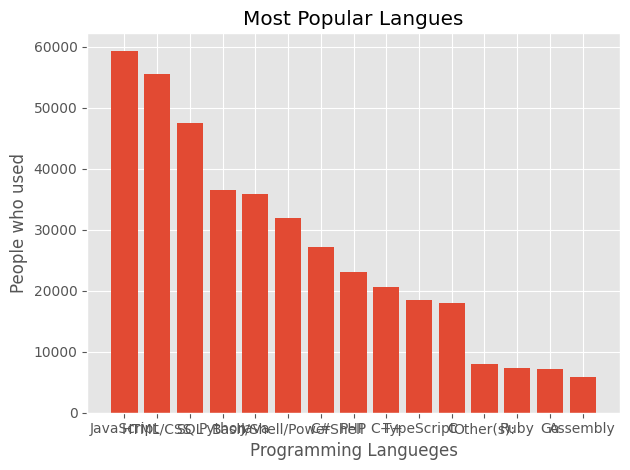

In [12]:
plt.bar(languages, popularity)

plt.title("Most Popular Langues")
plt.xlabel("Programming Langueges")
plt.ylabel("People who used")

plt.tight_layout()
plt.show()

Notice how the x-axis is too crowed. We can change the bar chart to a horizontal chart by changing plt.bar to plt.barh

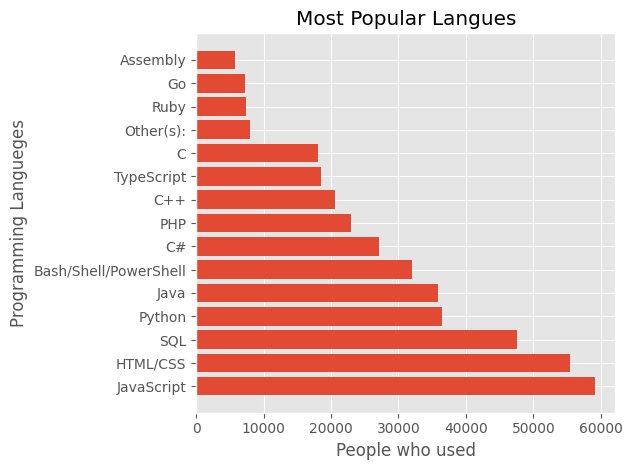

In [14]:
plt.barh(languages, popularity)

plt.title("Most Popular Langues")
plt.ylabel("Programming Langueges")
plt.xlabel("People who used")

plt.tight_layout()
plt.show()

Now, let's see how to load in data using pandas. See code below that is commented out. 

In [ ]:
# import pandas as pd

# data = pd.read_csv('data_for_tutorial_part_2.csv')
# ids = data['Responder_id']
# lang_responses = data['LanguagesWorkedWith']

# for response in lang_responses:
#     language_counter.update(response.split(';'))


# for item in language_counter.most_common(15):
#     languages.append(item[0]) # this is the list of most popular langauges
#     popularity.append(item[1]) # this is the value of times they were used. 